# Introduction
This project made use of the Global Terrorism database, by way of Bayesian inference we were instucted to compare two populations on intrest.

In [1]:
# Importing libraries for later use
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
#Reading in the data
data = pd.read_csv('globalterrorismdb_0616dist.csv')

/Users/carltonmezetin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# Looking at the columns in the datasets
#list(data.columns.values)

#### Cleaning

In [16]:
#Selecting column of interest for values
data['attacktype1'].value_counts().sum

<bound method Series.sum of 3    75963
2    37554
1    17582
6     9115
7     8849
9     5490
5      835
8      828
4      556
Name: attacktype1, dtype: int64>

In [17]:
# Sorting the data to only have attacks types of intrest
df = data[data.attacktype1 == 3]
# Selecting Columns of intrest
data[['attacktype1_txt', 'attacktype1', 'region', 'region_txt']].head()

,attacktype1_txt,attacktype1,region,region_txt
0,Assassination,1,2,Central America & Caribbean
1,Hostage Taking (Kidnapping),6,1,North America
2,Assassination,1,5,Southeast Asia
3,Bombing/Explosion,3,8,Western Europe
4,Facility/Infrastructure Attack,7,4,East Asia


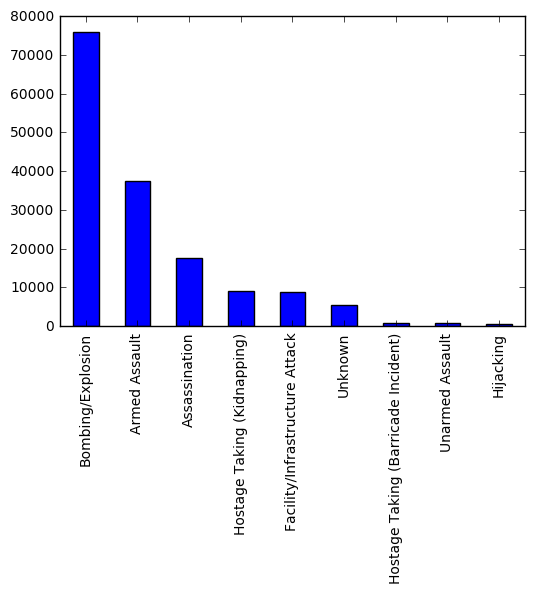

In [19]:
# Lets Look at the number of attacks by type
data.attacktype1_txt.value_counts().plot(kind='bar')

Most attacks across the dataset are bombings

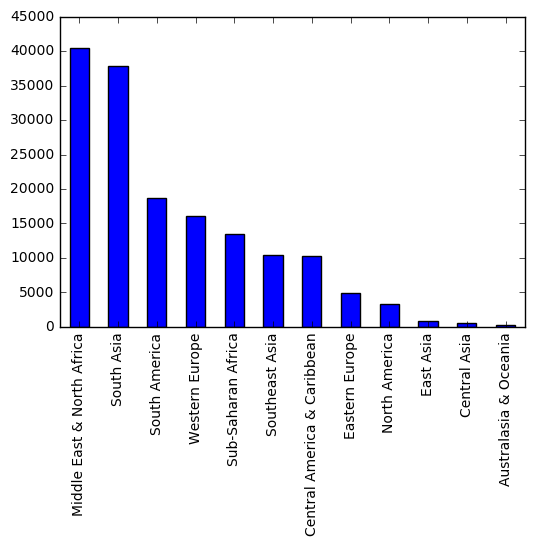

In [21]:
# number of terror attacks for region
data.region_txt.value_counts().plot(kind='bar')

##### Relative to the rest of the worl NorthAmerica doesn't rank as high as I would have previously thought. Being realtively safe I want to explore the regions with lower number of terror attacks

In [22]:
# Which countries dont have alot of  terror instances
# 4 East Asia
# 7 Cetral Asia
# 12 Australia 

In [23]:
# creating a data frame with regions that have the least amount of  attacks
df = data[(data.region == 12) | (data.region == 7) | (data.region == 4)]

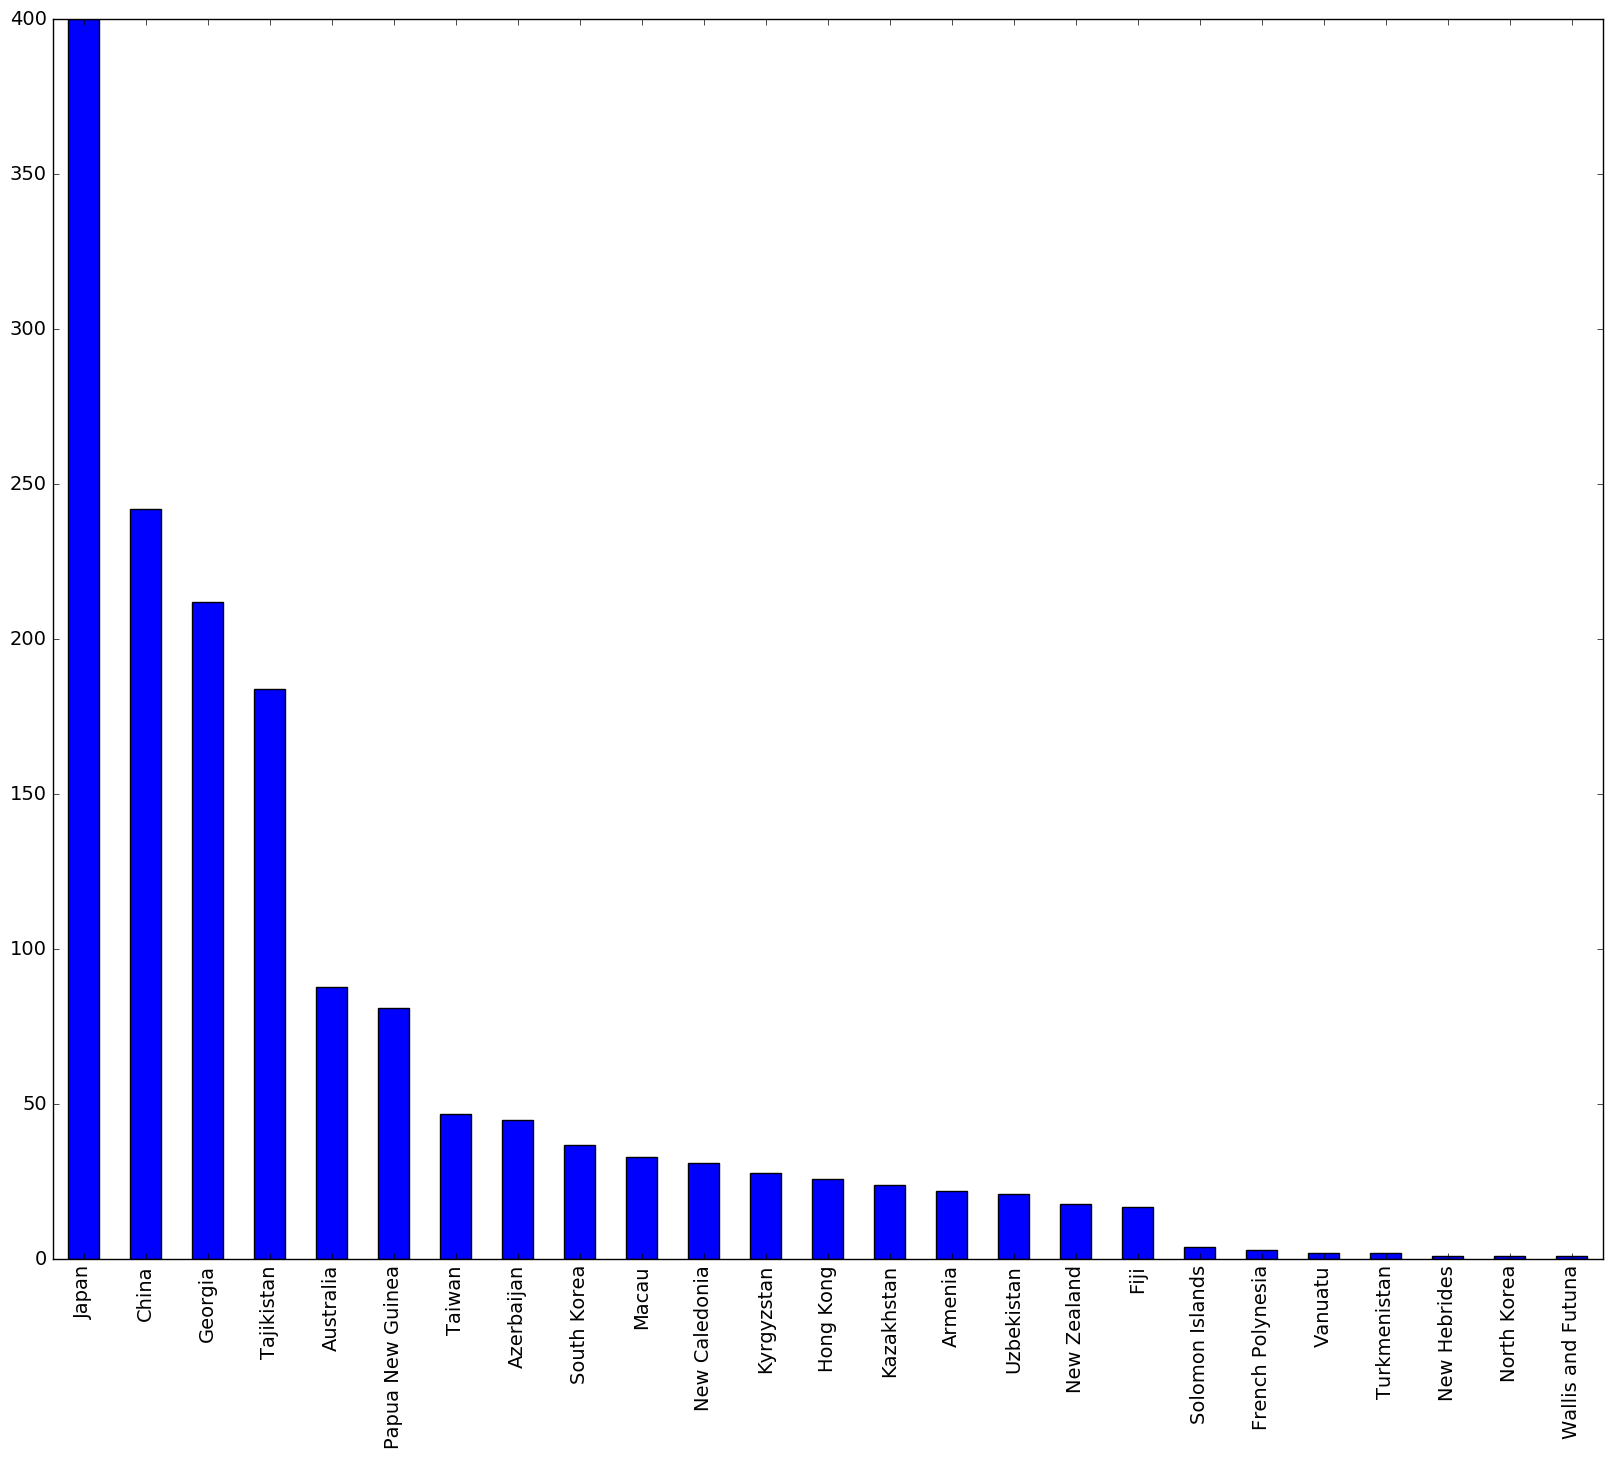

In [55]:
# What countries are in this region?
# which have the highest number of attacks
df.country_txt.value_counts().plot(kind='bar')

#### Looks like Japan and China are Global powers in this region with GDP most comparable to the US.

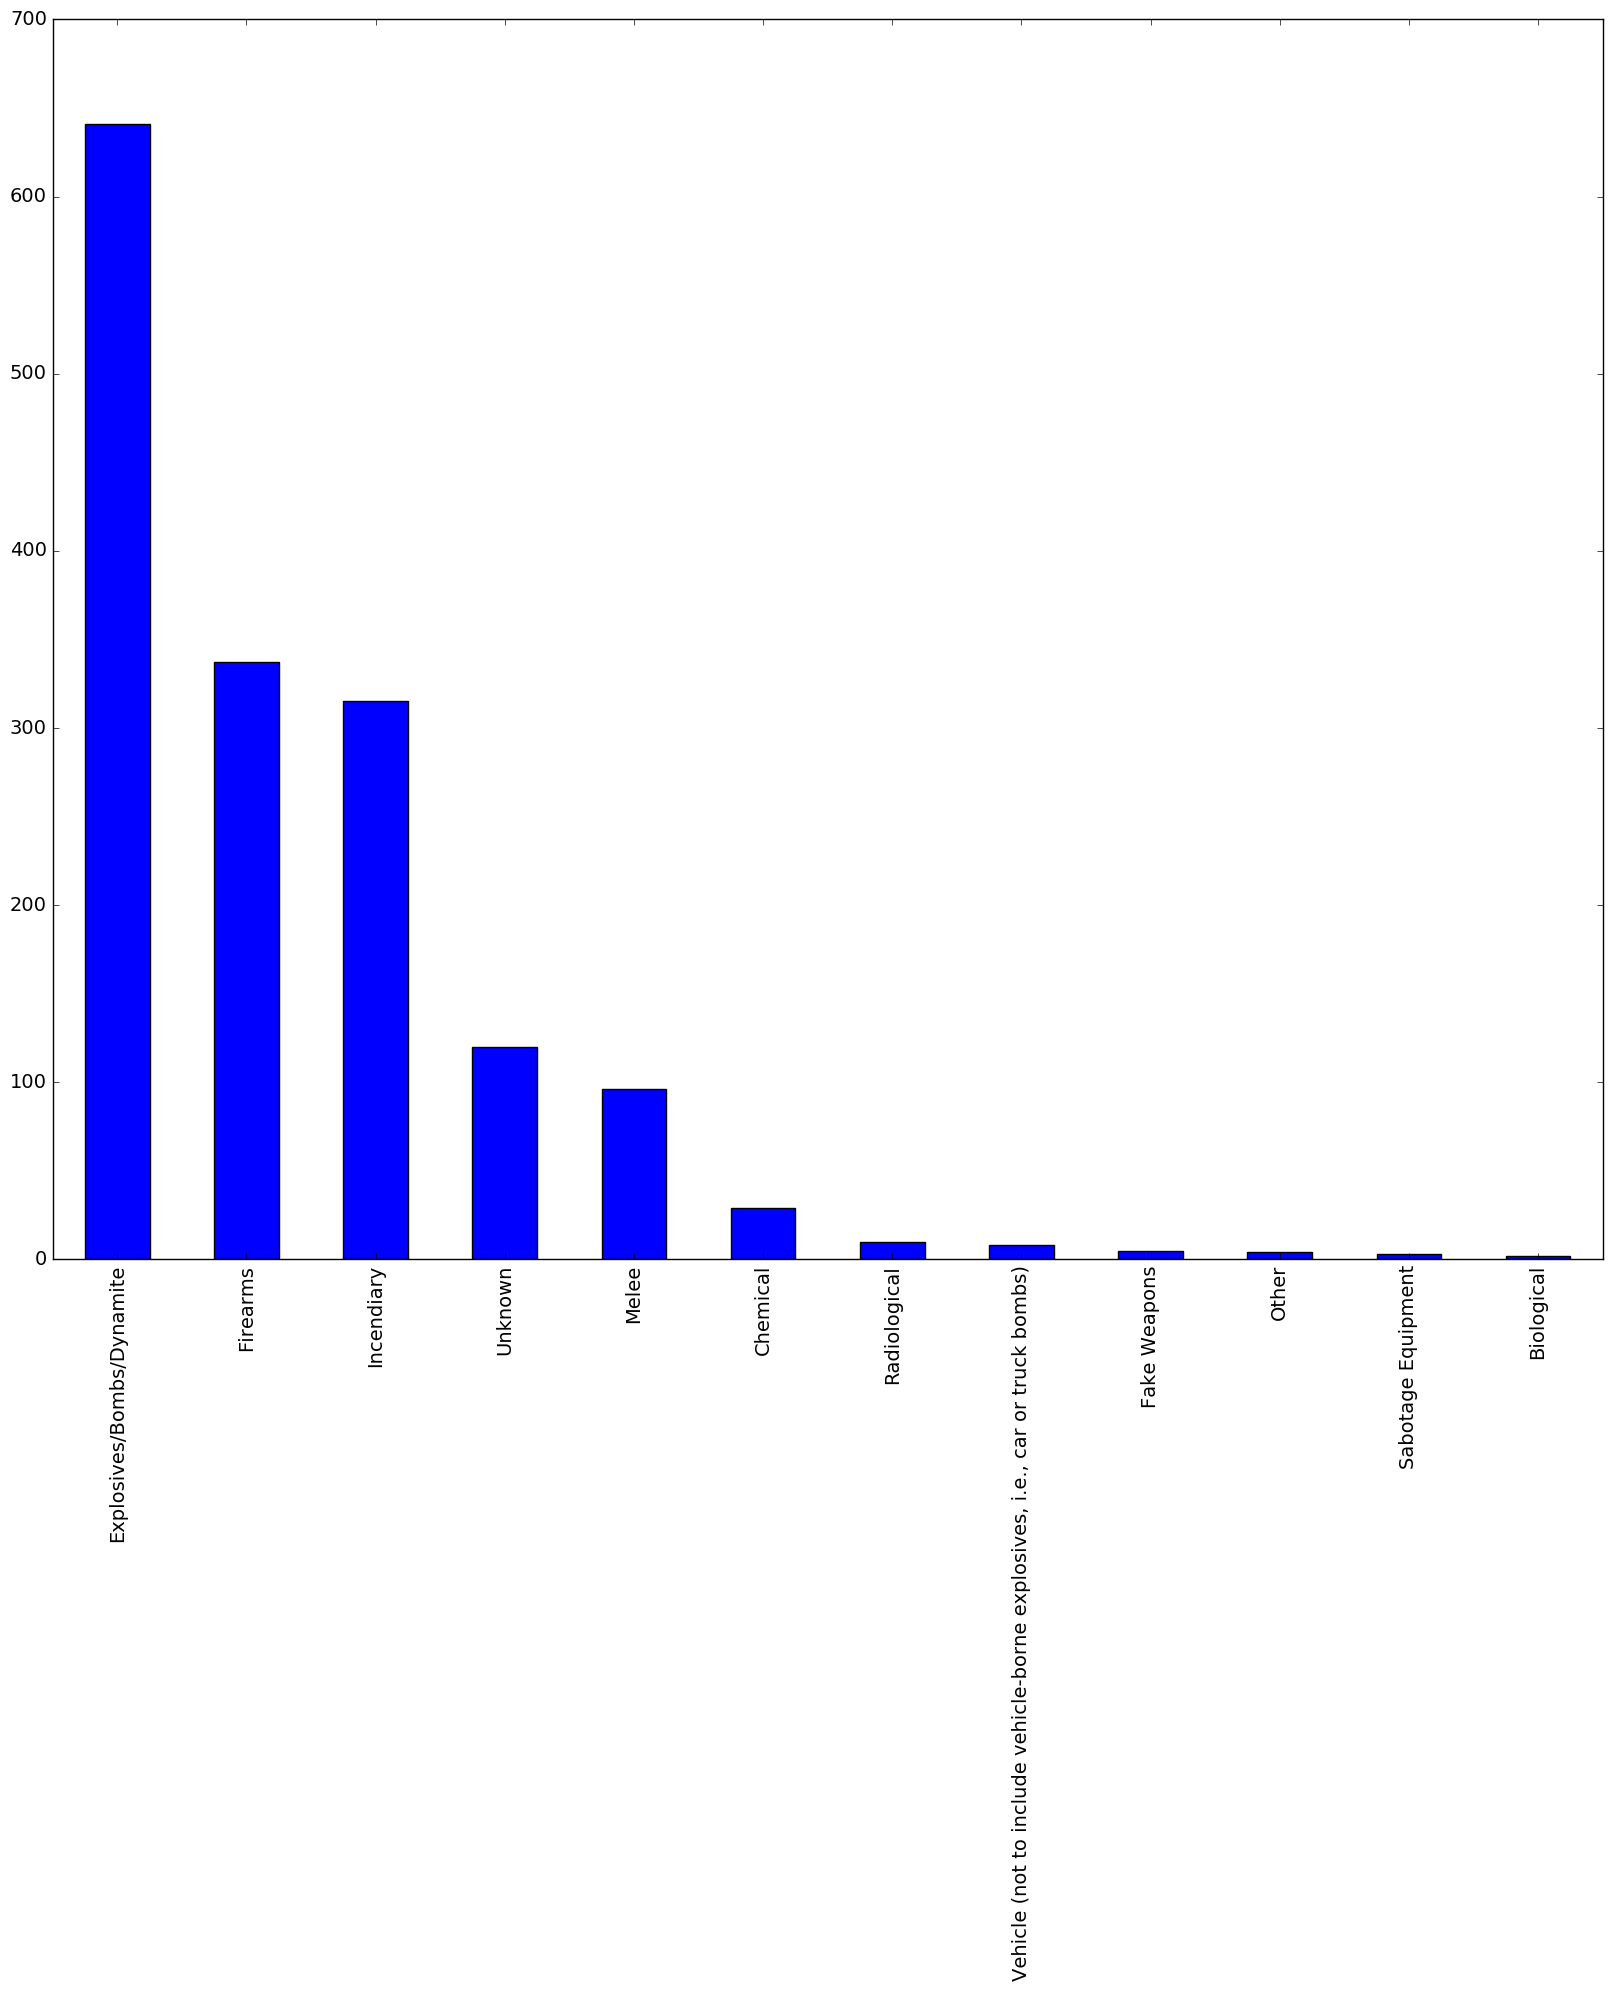

In [56]:
# Lets look at the types weapons used here and see if its the same as our above anaylsis
df.weaptype1_txt.value_counts().plot(kind='bar')

In [57]:
# Numerical breakdown of weapon types
df.weaptype1_txt.value_counts().sum

<bound method Series.sum of Explosives/Bombs/Dynamite                                                      641
Firearms                                                                       337
Incendiary                                                                     315
Unknown                                                                        120
Melee                                                                           96
Chemical                                                                        29
Radiological                                                                    10
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      8
Fake Weapons                                                                     5
Other                                                                            4
Sabotage Equipment                                                               3
Biological                                                 

#### Looks like once again the Expolosives/ Bombs are the most common

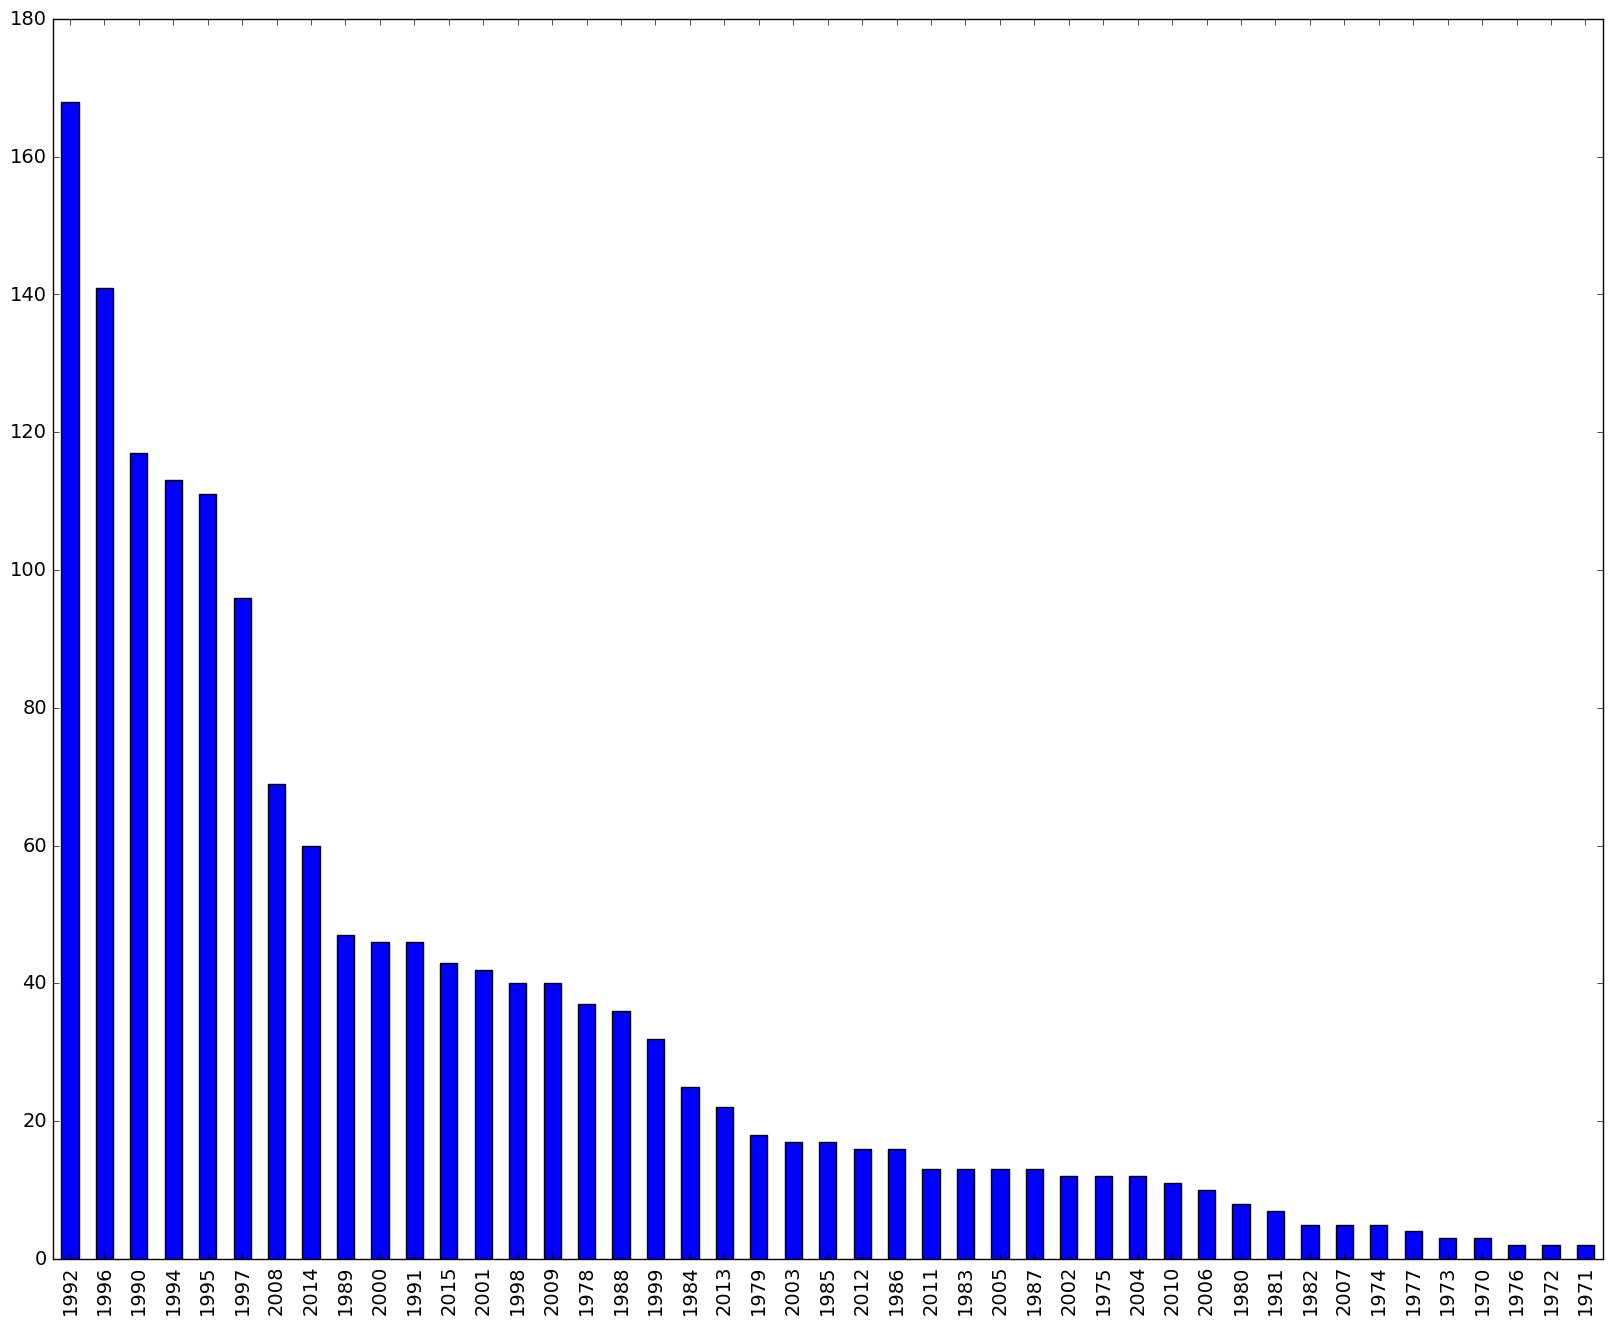

In [58]:
# Lets which years have the largest numbers of terror attacks
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['font.size'] = 14
df.iyear.value_counts().plot(kind='bar')

##### The early to mid 1990's seem to show a drastic spike in attacks with 1992 and 1996 withdratis increases

# Bayesian Inference
The two populations of intrest are those of Japan and China, both being in a relatively safe region worldwide. I want to see if theres a major difference betwen the two.

In [59]:
# Importing Library 
import pymc3 as pm

In [60]:
#Selectin Populations of Intrest
jap = df[(df.country == 101)]
chi = df[(df.country == 44)]

In [61]:
# calculating priors 
mean_prior = df.country.value_counts().mean()
std_prior = df.country.value_counts().std()
print mean_prior
print std_prior


62.8
96.6816080407


In [66]:
#priors on mean
with pm.Model() as model:

    jap_mean = pm.Normal('JAP_mean', mean_prior, sd=std_prior)
    chi_mean = pm.Normal('CHI_mean', mean_prior, sd=std_prior)

# prior on std
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    jap_std = pm.Uniform('JAP_std', lower=std_prior_lower, upper=std_prior_upper)
    chi_std = pm.Uniform('CHI_std', lower=std_prior_lower, upper=std_prior_upper)

#Fitting model with priors  
with model:
    jap_dis = pm.Normal('dis_j', mu=jap_mean, sd=jap_std, observed=mean_prior)
    chi_dis = pm.Normal('dis_c', mu=chi_mean, sd=chi_std, observed=mean_prior)

In [37]:
# Running simulation
with model:
    trace = pm.sample(5000, njobs=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -15.125: 100%|██████████| 200000/200000 [00:26<00:00, 7463.53it/s]
Finished [100%]: Average ELBO = -14.832
100%|██████████| 5000/5000 [00:27<00:00, 179.24it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x128f80d50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1274a7490>], dtype=object)

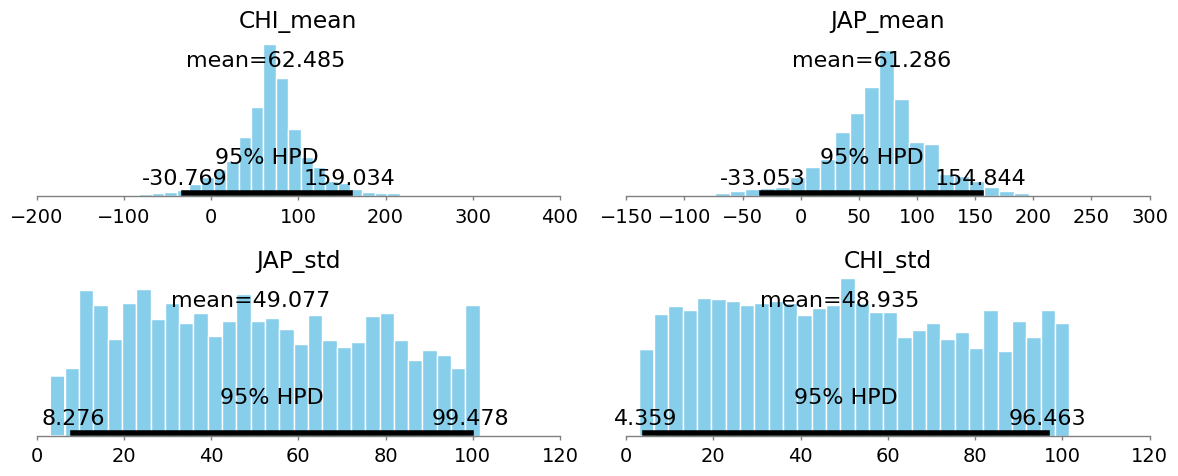

In [67]:
# Plotting Results
pm.plot_posterior(trace[3000:],
                  varnames=['JAP_mean','JAP_std', 'CHI_mean', 'CHI_std'],
                  color='#87ceeb')

#### Looks like the means of our new distributions are very similar. Both follow the same distribution with means very close to one another.
#### From this we can draw the conclusion that these two populations are statically similar because the two populations have mior differences.